### Loading the dataset

In [21]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
print(mnist['details'])

{'id': '554', 'name': 'mnist_784', 'version': '1', 'format': 'ARFF', 'upload_date': '2014-09-29T03:28:38', 'licence': 'Public', 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'status': 'active', 'processing_date': '2018-10-03 21:23:30', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


There are 70000 images and 28*28, in total 784 features.

## Disualize the data

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digits = x[40200]
some_digits_images = some_digits.reshape(28,28)


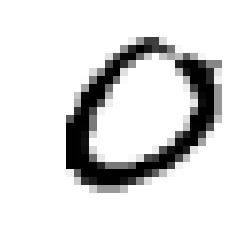

In [9]:
plt.imshow(some_digits_images, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [14]:
y[224]

'1'

In [17]:
import numpy as np
y = y.astype(np.uint8)


def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [18]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

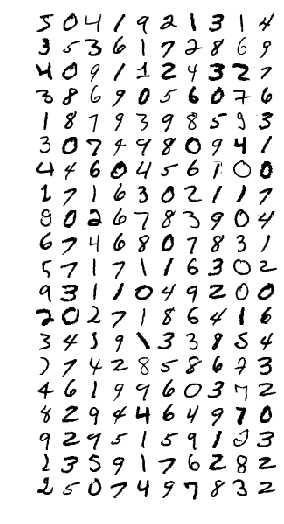

In [24]:
plt.figure(figsize=(9,9))
example_images = x[:200]
plot_digits(example_images, images_per_row=10)
plt.show()

In [25]:
# Splitting the dataset
# This means 60k data are for training and 10k data for testing
x_train, x_test, y_train, y_test = x[:60000],x[60000:], y[:60000],y[60000:]

## Making it a Binary classification problem by making it "5-detector" problem
### It will distinguish between two classes. 5 or not! Sounds cool!

In [26]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

# This means true for all 5's and false for others

In [28]:
# Now we have to pick a classifier and train it.

# Stochastic Gradient Descent (it can handle big datasets every efficiently)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
# Let's use it to detect the images of 5

sgd_clf.predict([some_digits])


array([False])

In [33]:
# Performance Measure with k fold cross validation with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Accuracy isn't always the base of performance measure

In [34]:
# A classifier that only images that are in 'not 5' class.

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [36]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

# Good accuracy but only 10% images are 5's. So if that image is not a 5, then we are right about 90% time.



array([0.91125, 0.90855, 0.90915])

In [37]:

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [39]:
y_train_perfect_predictions = y_train_5 
# pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [40]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012